In [1]:
import matplotlib.pyplot as plt

# 30 year fixed rate

In [2]:
N = 30 * 12 # total number of months in 30 years

initial_upb = 1e6 # initial unpaid principal balance in $

R = 0.04 # annual rate
r = R / 12 # monthly rate

monthly_payment = initial_upb * (r * (1 + r)**N) / ((1 + r)**N - 1) # the monthly payments is fixed and depends on the monthly rate and total number of months

# data structures to keep track of the payments for each month
upbs = [0] * (N + 1) # list of unpayed principal balances
upbs[0] = initial_upb
interests = [0] * (N + 1) # list of interest payments
principals = [0] * (N + 1) # list of principal payments

Lists are the data structures used to solve the mortgage problem.

First, a list with all the numbers indicating the months is created.

Second, lists for UPB, interest payments and principals are initialized with the same number of elements of the month list and all zero values.

Then, a for cycle from the second element of the month list to the end is performed: the cycle starts from the second element because it is needed to get the previous element using the index [i-1] (this is why the number of months is N+1).
During each iteration of the cycle, the values for UPB, interest payment and principal payment are computed and assigned to the corresponding lists through the index [i].

In [3]:
# compute mortgage payments
months = [x for x in range(0, N+1)]

for i in months[1:]:
  # compute payments for current month
  previous_upb = upbs[i-1]
  current_interest = r * previous_upb
  current_principal = monthly_payment - current_interest

  # update lists of payments
  interests[i] = current_interest
  principals[i] = current_principal
  upbs[i] = previous_upb - current_principal

Text(0.5, 0, 'Months')

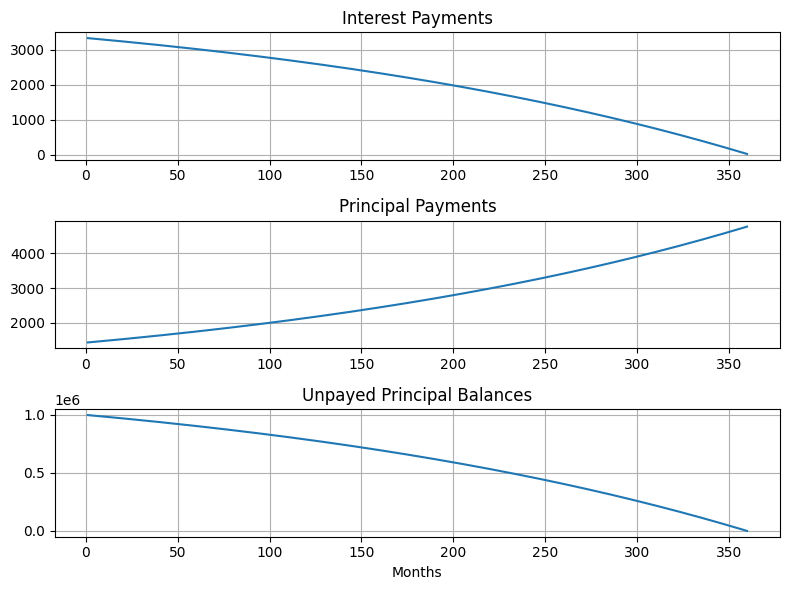

In [4]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(8,6)
fig.set_tight_layout('tight')
fig.set_dpi(100)

ax1.set_title('Interest Payments')
ax1.plot(months[1:], interests[1:])
ax1.grid()

ax2.set_title('Principal Payments')
ax2.plot(months[1:], principals[1:])
ax2.grid()

ax3.set_title('Unpayed Principal Balances')
ax3.plot(months[1:], upbs[1:])
ax3.grid()
ax3.set_xlabel('Months')

In [5]:
print('Final unpayed principal balance: ${:.2f}'.format(upbs[-1]))
print('Total principal payed: ${:.2f}'.format(sum(principals)))
print('Total interest payed: ${:.2f}'.format(sum(interests)))

Final unpayed principal balance: $0.00
Total principal payed: $1000000.00
Total interest payed: $718695.06


# 20 year fixed rate at 2.5% with dict

1.   List item
2.   List item




In [6]:
N = 20 * 12 # total number of months in 20 years

initial_upb = 1e6 # initial unpaid principal balance in $

R = 0.025 # annual rate
r = R / 12 # monthly rate

monthly_payment = initial_upb * (r * (1 + r)**N) / ((1 + r)**N - 1) # the monthly payments is fixed and depends on the monthly rate and total number of months

# data structures to keep track of the payments for each month
data = {
  'upbs': [0] * (N + 1), # list of unpayed principal balances 
  'interests': [0] * (N + 1), # list of interest payments
  'principals': [0] * (N + 1), # list of principal payments
}


data['upbs'][0] = initial_upb


In [7]:
# compute mortgage payments
months = [x for x in range(0, N+1)]

for i in months[1:]:
  # compute payments for current month
  previous_upb = data['upbs'][i-1]
  current_interest = r * previous_upb
  current_principal = monthly_payment - current_interest

  # update lists of payments
  data['interests'][i] = current_interest
  data['principals'][i] = current_principal
  data['upbs'][i] = previous_upb - current_principal

Text(0.5, 0, 'Months')

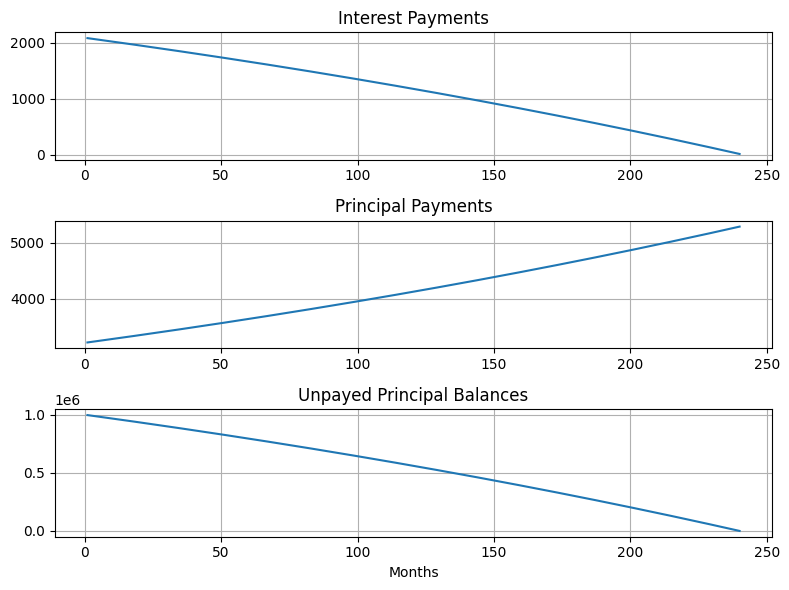

In [8]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(8,6)
fig.set_tight_layout('tight')
fig.set_dpi(100)

ax1.set_title('Interest Payments')
ax1.plot(months[1:], data['interests'][1:])
ax1.grid()

ax2.set_title('Principal Payments')
ax2.plot(months[1:], data['principals'][1:])
ax2.grid()

ax3.set_title('Unpayed Principal Balances')
ax3.plot(months[1:], data['upbs'][1:])
ax3.grid()
ax3.set_xlabel('Months')

In [9]:
print('Final unpayed principal balance: ${:.2f}'.format(data['upbs'][-1]))
print('Total principal payed: ${:.2f}'.format(sum(data['principals'])))
print('Total interest payed: ${:.2f}'.format(sum(data['interests'])))

Final unpayed principal balance: $0.00
Total principal payed: $1000000.00
Total interest payed: $271766.94


# 7-1 ARM

In [10]:
# list of annual rates in %
rates = [0,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,7.33,9,9,9,9,9,9,9,9,9,10.38,10.38,10.38,10.38,10.38,10.38,10.38,10.38,10.38,10.38,10.38,10.38,12.85,12.85,12.85,12.85,12.85,12.85,12.85,12.85,12.85,12.85,12.85,12.85,14.95,14.95,14.95,14.95,14.95,14.95,14.95,14.95,14.95,14.95,14.95,14.95,17.30,17.30,17.30,17.30,17.30,17.30,17.30,17.30,17.30,17.30,17.30,17.30,13.46,13.46,13.46,13.46,13.46,13.46,13.46,13.46,13.46,13.46,13.46,13.46,13.43,13.43,13.43,13.43,13.43,13.43,13.43,13.43,13.43,13.43,13.43,13.43,13.10,13.10,13.10,13.10,13.10,13.10,13.10,13.10,13.10,13.10,13.10,13.10,10.81,10.81,10.81,10.81,10.81,10.81,10.81,10.81,10.81,10.81,10.81,10.81,9.37,9.37,9.37,9.37,9.37,9.37,9.37,9.37,9.37,9.37,9.37,9.37,10.50,10.50,10.50,10.50,10.50,10.50,10.50,10.50,10.50,10.50,10.50,10.50,10.80,10.80,10.80,10.80,10.80,10.80,10.80,10.80,10.80,10.80,10.80,10.80,9.83,9.83,9.83,9.83,9.83,9.83,9.83,9.83,9.83,9.83,9.83,9.83,9.56,9.56,9.56,9.56,9.56,9.56,9.56,9.56,9.56,9.56,9.56,9.56,8.24,8.24,8.24,8.24,8.24,8.24,8.24,8.24,8.24,8.24,8.24,8.24,8.07,8.07,8.07,8.07,8.07,8.07,8.07,8.07,8.07,8.07,8.07,8.07,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,9.22,7.02,7.02,7.02,7.02,7.02,7.02,7.02,7.02,7.02,7.02,7.02,7.02,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.03,7.03,7.03,7.03,7.03,7.03,7.03,7.03,7.03,7.03,7.03,7.03,6.79,6.79,6.79,6.79,6.79,6.79,6.79,6.79,6.79,6.79,6.79,6.79,8.15,8.15,8.15,8.15,8.15,8.15,8.15,8.15,8.15,8.15,8.15,8.15,7.07,7.07,7.07]
print(len(rates))

361


In [11]:
N = 30 * 12 # total number of months in 30 years

initial_upb = 1e6 # initial unpaid principal balance in $

def compute_monthly_payment(upb, r, n):
  try:
    p = upb * (r * (1 + r)**n) / ((1 + r)**n - 1)
  except ZeroDivisionError:
    return 0
  return p

# data structures to keep track of the payments for each month
upbs = [0] * (N + 1) # list of unpayed principal balances
upbs[0] = initial_upb
monthly_payments = [0] * (N + 1)
interests = [0] * (N + 1) # list of interest payments
principals = [0] * (N + 1) # list of principal payments

In [12]:
# compute mortgage payments
months = [x for x in range(0, N+1)]

for i in months[1:]:
  previous_upb = upbs[i-1]

  # compute payments for current month
  r = rates[i] / 12 / 100
  remaining_months = N - i
  monthly_payment = compute_monthly_payment(previous_upb, r, remaining_months)
  
  current_interest = r * previous_upb
  current_principal = monthly_payment - current_interest

  # update lists of payments
  interests[i] = current_interest
  principals[i] = current_principal
  upbs[i] = previous_upb - current_principal

Text(0.5, 0, 'Months')

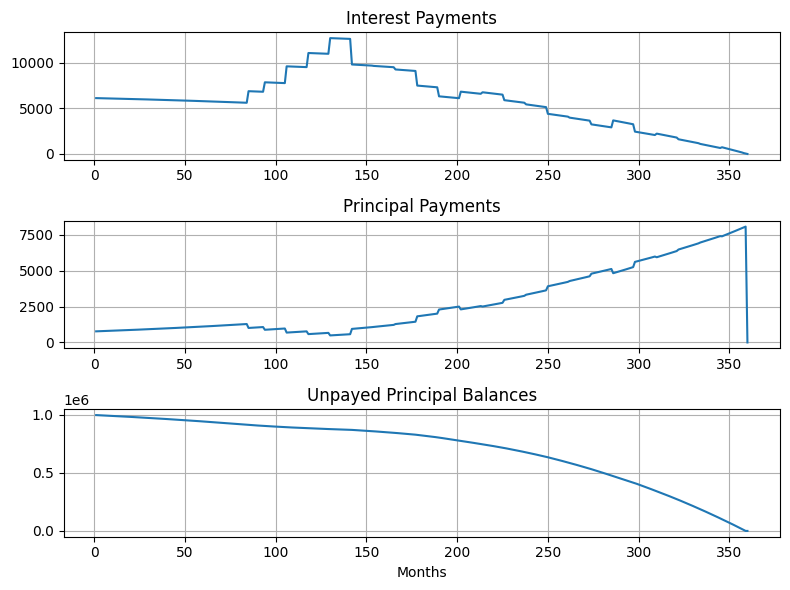

In [13]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(8,6)
fig.set_tight_layout('tight')
fig.set_dpi(100)

ax1.set_title('Interest Payments')
ax1.plot(months[1:], interests[1:])
ax1.grid()

ax2.set_title('Principal Payments')
ax2.plot(months[1:], principals[1:])
ax2.grid()

ax3.set_title('Unpayed Principal Balances')
ax3.plot(months[1:], upbs[1:])
ax3.grid()
ax3.set_xlabel('Months')

In [14]:
print('Final unpayed principal balance: ${:.2f}'.format(upbs[-1]))
print('Total principal payed: ${:.2f}'.format(sum(principals)))
print('Total interest payed: ${:.2f}'.format(sum(interests)))

Final unpayed principal balance: $-0.00
Total principal payed: $1000000.00
Total interest payed: $2102264.10
